In [61]:
library(repr)
options(repr.plot.width=8,repr.plot.height=4) #controlo el tamaÃƒÂ±o de la ventana grafica

In [14]:
## Add an alpha value to a colour
add.alpha <- function(col, alpha=1) {
    if(missing(col))
        stop("Please provide a vector of colours.")
    apply(sapply(col, col2rgb)/255, 2, 
          function(x) {rgb(x[1], x[2], x[3], alpha=alpha)})  
}

## Ej 1

In [24]:
nieve = c(
126.4, 82.4, 78.1, 51.1, 90.9, 76.2, 104.5, 87.4, 110.5, 25.0, 69.3, 53.5,
39.8, 63.6, 46.7, 72.9, 79.6, 83.6, 80.7, 60.3, 79.0, 74.4, 49.6, 54.7,
71.8, 49.1, 103.9, 51.6, 82.4, 83.6, 77.8, 79.3, 89.6, 85.5, 58.0, 120.7,
110.5, 65.4, 39.9, 40.1, 88.7, 71.4, 83.0, 55.9, 89.9, 84.8, 105.2, 113.7,
124.7, 114.5, 115.6, 102.4, 101.4, 89.8, 71.5, 70.9, 98.3, 55.5, 66.1, 78.4,
120.5, 97.0, 110.0)

### Ej 1.1

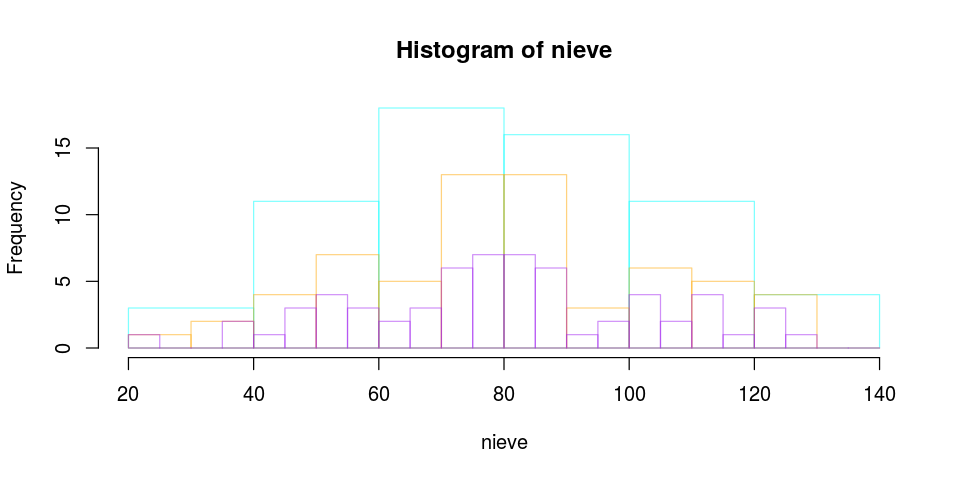

In [25]:
#par(mfrow=c(1, 3))
cols = add.alpha(c('cyan', 'orange', 'purple'), 0.5)
hist(nieve, col=NULL, border=cols[1])
hist(nieve, breaks=seq(20, 140, 10), add=T, col=NULL, border=cols[2])
hist(nieve, breaks=seq(20, 140, 5), add=T, col=NULL, border=cols[3])

### Ej 1.2

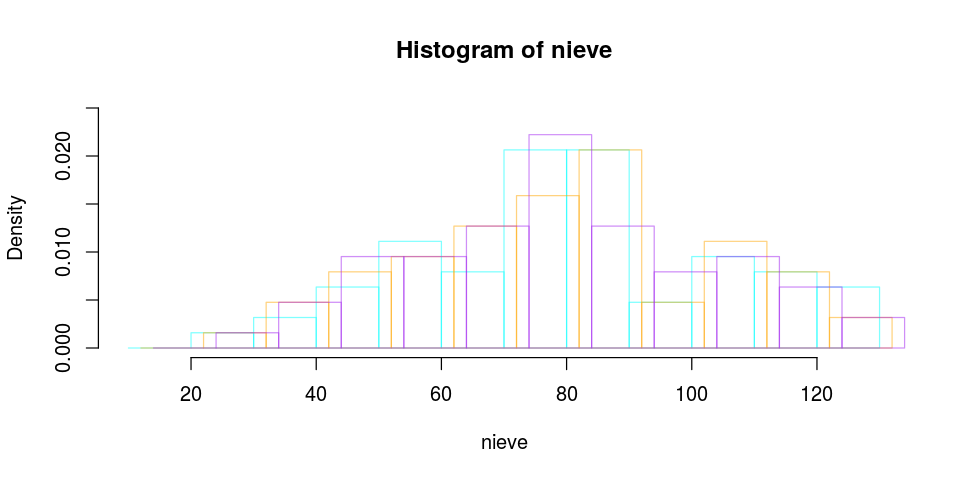

In [26]:
for (i in 0:2) {
    hist(nieve, breaks=seq(10, 130, 10) + 2 * i, add=i != 0, col=NULL, border=cols[i+1], freq=F, ylim=c(0, 0.025))
}

### Ej 1.3

In [46]:
densidad.est.parzen = function(xs, h, x) {
    std = (xs - x) / h
    (mean(-1 < std & std < 1) / (2 * h))
}

### Ej 1.4

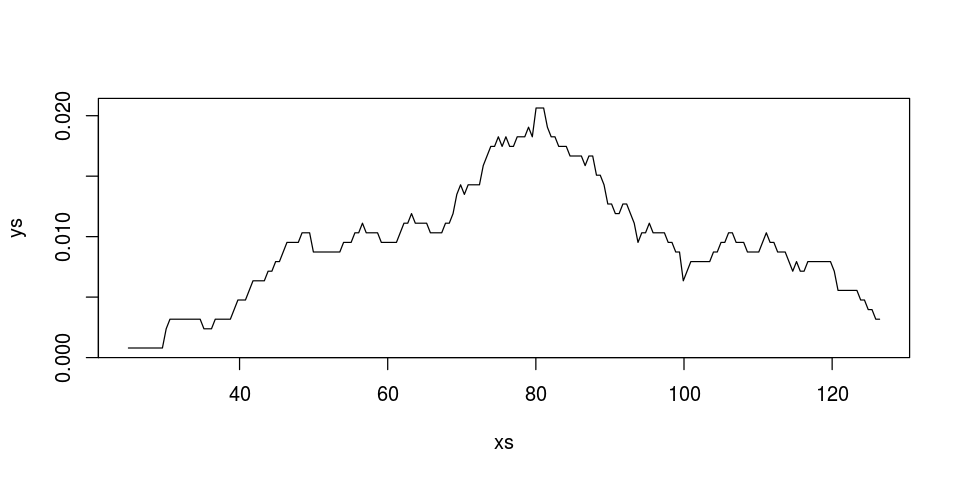

In [47]:
xs = seq(min(nieve), max(nieve), length.out=200)
ys = sapply(xs, function(t) {densidad.est.parzen(nieve, 10, t)})
plot(xs, ys, type='l')

### Ej 1.5

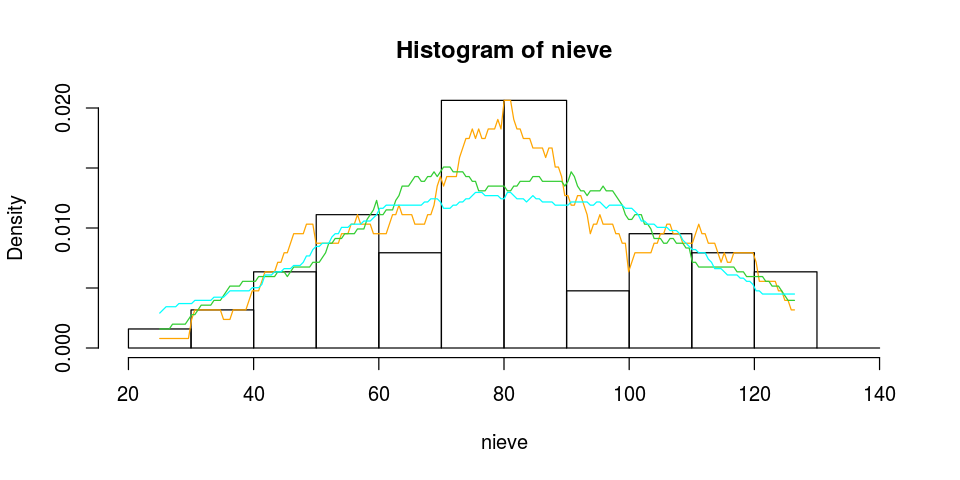

In [49]:
hist(nieve, breaks=seq(20, 140, 10), freq=F, ylim=c(0, 0.020))
cols = c('orange', 'limegreen', 'cyan')
hs = c(10, 20, 30)
for (i in 1:3) {
    xs = seq(min(nieve), max(nieve), length.out=200)
    ys = sapply(xs, function(t) { densidad.est.parzen(nieve, hs[i], t)})
    lines(xs, ys, col=cols[i])
}

### Ejercicio 2

#### Ej 2.1

In [51]:
h.opt.mv.cross = function(ma, window) {
    hs = seq(0.001, 1, length.out=10)
    argmax = which.max(sapply(hs, function(h) {
        mean(sapply(1:length(ma), function(one_out) {
            ma_one_out = ma[-one_out]
            log(density(ma_one_out, bw=h, kernel=window, from=ma[one_out], to=ma[one_out], n=1)$y)
        }))
    }))
    hs[argmax]
}

In [57]:
hongos.data = read.table("http://www.ic.fcen.uba.ar/~anab/hongos_clasificados.txt", header=T)
hongos.data.height = hongos.data[,1]
hongos.data.var = hongos.data[,2]
hongos.data.height.1 = hongos.data.height[hongos.data.var == 1]
hongos.data.height.2 = hongos.data.height[hongos.data.var == 2]

In [58]:
hongos.density.est.1.h = h.opt.mv.cross(hongos.data.height.1, 'epanechnikov')
hongos.density.est.1 = density(hongos.data.height.1, kernel='epanechnikov', 
                               bw=hongos.density.est.1.h)

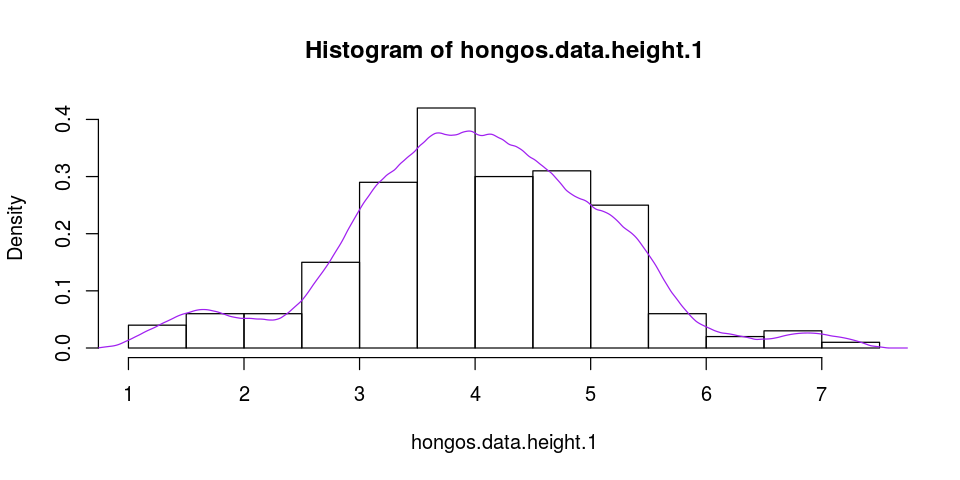

In [63]:
hist(hongos.data.height.1, freq=F)
lines(hongos.density.est.1, col='purple')

#### Ej 2.2

In [64]:
hongos.density.est.2.h = h.opt.mv.cross(hongos.data.height.2, 'epanechnikov')
hongos.density.est.2 = density(hongos.data.height.2, kernel='epanechnikov', 
                               bw=hongos.density.est.2.h)

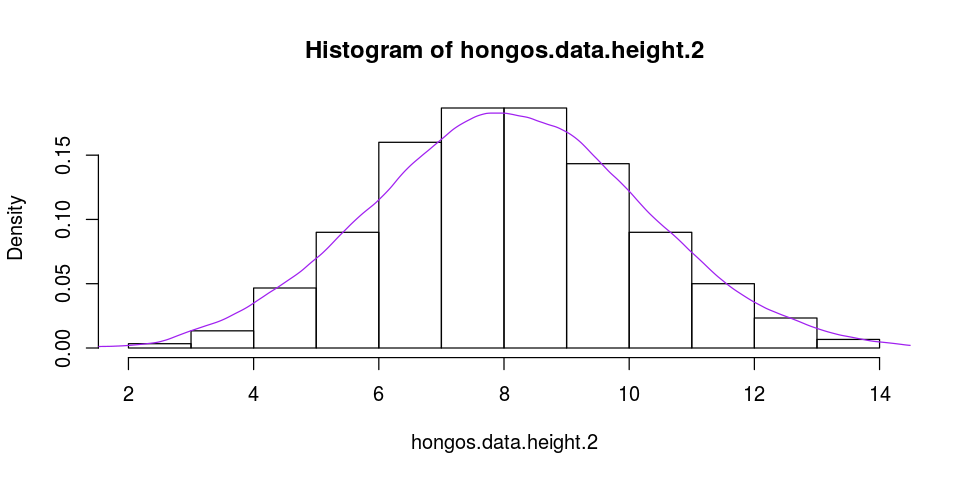

In [65]:
hist(hongos.data.height.2, freq=F)
lines(hongos.density.est.2, col='purple')

In [66]:
hongos.p.1 = mean(hongos.data.var == 1)
hongos.p.2 = mean(hongos.data.var == 2)

#### Ej 2.3

In [90]:
class.optim.est.variedad = function(t, kernel, ma) {
    p_1 = density(hongos.data.height.1, kernel='epanechnikov', bw=hongos.density.est.1.h,
                 from=t, to=t, n=1)$y * hongos.p.1
    p_2 = density(hongos.data.height.2, kernel='epanechnikov', bw=hongos.density.est.2.h,
                 from=t, to=t, n=1)$y * hongos.p.2
    if (p_1 > p_2) {
        1
    } else {
        2
    }
}
sprintf('¿El h* se re calcula cada vez?')
sprintf('¿Balanceo las clases en cada fold?')

[1] "¿El h* se re calcula cada vez?"

[1] "¿Balanceo las clases en cada fold?"

#### Ej 2.4